In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For offline plotting in Jupyter notebooks
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

# Initialize Plotly's notebook mode
init_notebook_mode(connected=True)


C:\Users\dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import Dataset...
tesla =  pd.read_csv("tesla.csv")

In [3]:
tesla.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.0,25.0,17.540001,23.889999,23.889999,18766300


In [4]:
# Checking the shape of dataset..
tesla.shape

(2193, 7)

In [5]:
# checking for missing values..
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# checking for duplicate values..
tesla.duplicated().sum()

0

In [7]:
# checking the Info about the dataset
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [8]:
# Converting the 'Date' col into 'Datetime'...
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\dell\AppData\Local\Temp\ipykernel_9700\2588742667.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [9]:
# now we have this data after small change in the 'Date' col...
tesla.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [10]:
# Checking the date range of the stock prices....

print(f'Dataframe contains stock prices between {tesla.Date.min()} and {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 and 2019-03-15 00:00:00
Total days = 3181 days


In [11]:
# Checking the States of the data...
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


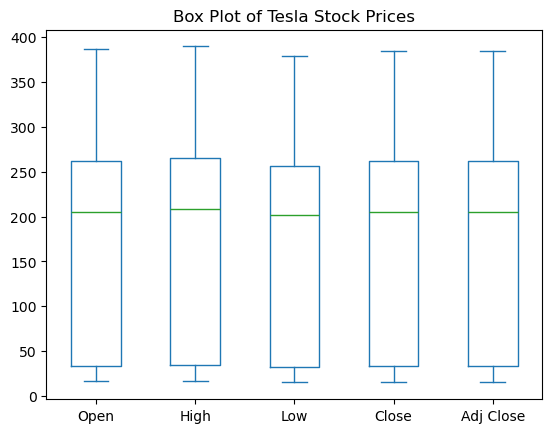

In [12]:
# Box plot of every single col...
tesla[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')
plt.title('Box Plot of Tesla Stock Prices')
plt.show()


C:\Users\dell\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



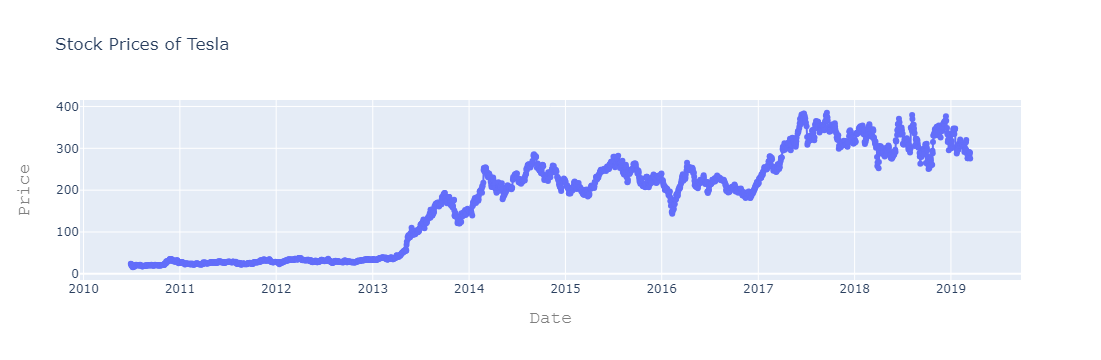

In [13]:
# Create a scatter plot with lines and markers showing Tesla's closing stock prices over time....


# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Prepare the data
tesla_data = [{
    'x': tesla['Date'],
    'y': tesla['Close'],
    'type': 'scatter',
    'mode': 'lines+markers',
    'name': 'Close Price'
}]

# Create the figure
plot = go.Figure(data=tesla_data, layout=layout)

# Display the plot
plot.show()


## Train_test_split:

In [14]:
X = tesla[['Open', 'High', 'Low', 'Volume']]   # input cols
y = tesla['Close']      #output col

In [15]:
X

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
2188,283.519989,291.279999,280.500000,7392300
2189,286.489990,288.070007,281.059998,7504100
2190,283.899994,291.989990,282.700012,6844700
2191,292.450012,295.390015,288.290009,7074200


In [16]:
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2188    290.920013
2189    283.359985
2190    288.959991
2191    289.959991
2192    275.429993
Name: Close, Length: 2193, dtype: float64

In [17]:
# Doing train_test_split...
from sklearn.model_selection import train_test_split

# Ensure you do not shuffle the data for time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=False)


In [18]:
X_train

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
1749,374.420013,376.869995,354.799988,17261400
1750,357.989990,364.500000,350.619995,10517700
1751,367.619995,376.000000,366.609985,11807900
1752,381.089996,384.250000,376.309998,12818400


## Feature Scaling:

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [20]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [21]:
X_train_Scaled

array([[-1.21619719, -1.16290745, -1.2236261 ,  3.36307646],
       [-1.14725039, -1.10865703, -1.16426506,  2.99434209],
       [-1.15527219, -1.15369889, -1.19549144,  0.90029419],
       ...,
       [ 2.32374834,  2.35035767,  2.373798  ,  1.73832897],
       [ 2.46052497,  2.43293441,  2.4737638 ,  1.97427507],
       [ 2.37330072,  2.34495255,  2.37256136,  1.41577979]])

## Model Building:

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
lr = LinearRegression()

In [30]:
# training the model with training data
lr.fit(X_train_Scaled,y_train)

LinearRegression()

In [31]:
# Predictions...
y_predict = lr.predict(X_test_Scaled)

In [32]:
print(y_predict)

[371.90637666 370.83463281 373.1011778  371.65675281 380.30471165
 383.69278958 376.59686955 365.49888002 367.5852362  358.43498489
 363.00147848 357.0725192  331.2963959  311.54720752 311.46549458
 309.47354838 323.81958542 327.94926647 323.56039713 325.88391271
 317.57899489 325.64159422 327.14223114 327.46352453 328.04599068
 340.79165554 337.21634626 342.79458763 332.40029348 335.70650155
 329.53796927 318.83913728 319.67715504 347.19108491 352.54572387
 355.47474346 366.40743542 366.75416319 360.42700277 357.8791525
 365.45030527 360.95373427 365.38647902 355.6290628  348.33489842
 335.24324192 339.07463161 350.41761423 353.71962774 350.14098348
 341.56073232 346.76446852 350.69624366 356.90416265 355.37597627
 349.17780963 344.67424229 349.3547127  344.52892363 360.42255629
 364.79319981 364.04885331 374.21775238 377.53008564 385.90922521
 376.9826536  375.74342402 368.62307247 357.51539707 348.89699584
 343.50206898 344.038974   338.74485894 341.58792972 338.10039444
 342.744316

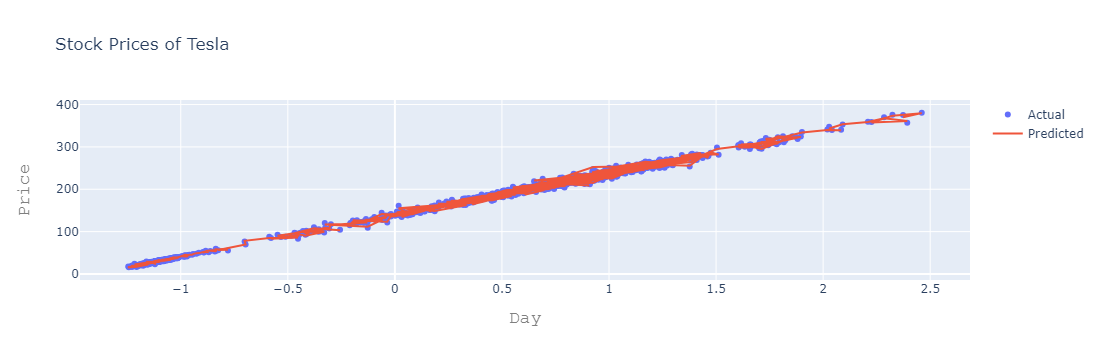

In [33]:
# Plot actual and predicted values for the training dataset
trace0 = go.Scatter(
    x=X_train_Scaled.T[0], 
    y=y_train,     
    mode='markers', 
    name='Actual'   
)

trace1 = go.Scatter(
    x=X_train_Scaled.T[0],               
    y=lr.predict(X_train_Scaled).T,     
    mode='lines',                 
    name='Predicted'              
)

# Combine the traces into a list
tesla_data = [trace0, trace1]

# Update the layout with a title for the x-axis
layout.xaxis.title.text = 'Day'


plot2 = go.Figure(data=tesla_data, layout=layout)
plot2.show()


In [34]:
# Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lr.predict(X_train_Scaled)):<20}{r2_score(y_test, lr.predict(X_test_Scaled)):<20}
{'MSE'.ljust(10)}{mean_squared_error(y_train, lr.predict(X_train_Scaled)):<20}{mean_squared_error(y_test, lr.predict(X_test_Scaled)):<20}
'''

print(scores)



Metric           Train                Test        
r2_score  0.9997647686490113  0.986806769971753   
MSE       2.284623596465344   10.451184631602588  



## Exporting the Model:

In [40]:
import pickle

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)


In [43]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,2019-03-11,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,2019-03-12,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,2019-03-14,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
